# Conteo de Estrellas

Primero importamos las librerias a usar:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import urllib
import scipy
import cv2
from scipy import misc
from skimage.feature import canny
from skimage import io
from skimage import color
#https://github.com/swanandM/Galaxy-Star-Count-Mpi4py

Con el siguiente código obtenemos la imagen de estrellas con su url

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


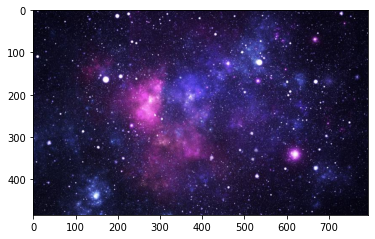

In [ ]:
import requests
url = "https://enciclopediauniverso.com/wp-content/uploads/2018/05/estrellas.jpg"
resp = requests.get(url, stream=True, verify=False).raw
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Imagen en escala gris:

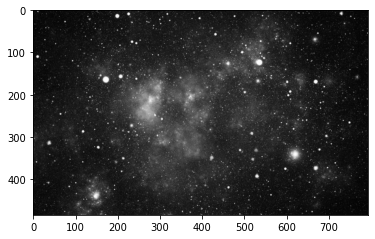

In [ ]:
estrellas = image.copy()
#estrellas = cv2.imread("/estrellas.jpg")

R1 = estrellas[:, :, 0]
G1 = estrellas[:, :, 1]
B1 =estrellas[:, :, 2]
img1_gray = R1 * 299. / 1000 + G1 * 587. / 1000 + B1 * 114. / 1000

img1_gray = img1_gray.astype('int32')
plt.imshow(img1_gray, cmap = plt.get_cmap('gray'))
plt.show()

## **Conteo de las estrellas presentes en la imagen**

![texto alternativo](https://drive.google.com/uc?id=1KyD2rUB9NliA8w9iH3c1fS4wGv4qO1eh)


In [ ]:
import numpy as np
import cv2

**Paso 1. Convertir la imagen a escala de grises.**

Esto se realiza porque al trabajar con imágenes a color, el coste computacional crece de manera exponencial. Por ejemplo, si tienes tres componentes de color como en el espacio RGB es como si estuvieras trabajando con 3 imágenes diferentes, una para cada componente.

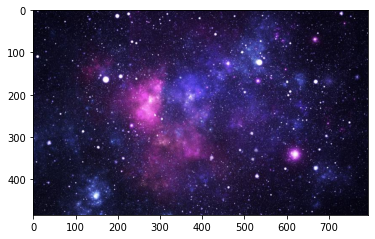

In [ ]:
# Cargamos la imagen
original = image.copy()
plt.imshow(image)
plt.show()

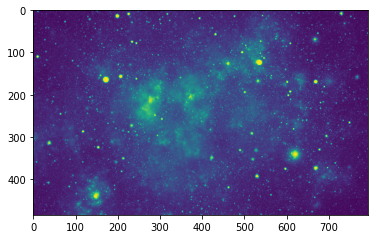

In [ ]:
# Convertimos a escala de grises
gris = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

plt.imshow(gris)

**Paso 2. Filtrar el ruido de la imagen.**

En el tratamiento digital de imágenes hay diferentes métodos para eliminar el ruido (promediado, mediana, Gaussiano o bilateral).

Todos utilizan la misma operación matemática, la convolución. Consiste en ir recorriendo píxel a píxel una imagen  con una máscara o kernel de $N \times N$. Este tamaño determina el número de píxeles con el que vamos a trabajar. Es muy importante que el tamaño sea impar para siempre tener un píxel central que será el píxel en cuestión que estamos tratando. El objetivo es suavizar la imagen es decir, eliminar los detalles.

Vamos a usar el filtro Gaussiano.

Se basa en la campana de Gauss con el objetivo de darle más importancia a los pixeles más cercanos al del dentro

![texto alternativo](https://drive.google.com/uc?id=1S2kgFiKcdzVJjaxU-O6sk3Llf8nmNhay)

![texto alternativo](https://drive.google.com/uc?id=158mzNVkJv5c--mKSIuZpaHOvVpoyMrB1)

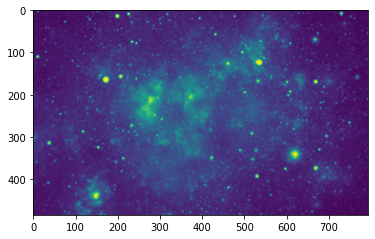

In [ ]:
 # Aplicar suavizado Gaussiano
gauss = cv2.GaussianBlur(gris.copy(), (5,5), 0) #gris = imagen, (5,5)= Tamaño del kernel o máscara de convolución, 0(default)= desv estándar en el eje x, es decir la anchura de la campana de Gauss
 
plt.imshow(gauss)
plt.show()


**Paso 3. Detección de bordes.**


Para esto, usamos la función canny que aplica la primera derivada para medir el cambio de intensidad de los pixeles. Luego, canny hace un filtrado de bordes aplicando la supresión non-maximun que permite adelgazar los bordes utilizando el gradiente. Por último, esta función hace una segmentación de los objetos de la imagen usando la técnica de umbralización, que básicamente consiste en determinar un umbral por el cual se decide si un píxel forma parte del fondo o forma parte de un objeto.

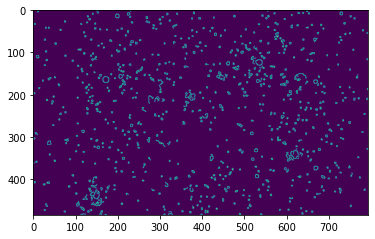

In [ ]:
# Detectamos los bordes con Canny
canny = cv2.Canny(gauss.copy(), 50, 150) #gauss = imagen, 50=umbral mínimo para el proceso de umbralización, 150=umbral máximo para el proceso de umbralización
 
plt.imshow(canny)
plt.show()

**Paso 4. Detección de contornos.**

Diferencia entre bordes y contornos: 

Borde: Cambios de intensidad pronunciados.

Contorno: Curva de puntos sin huecos ni saltos

![texto alternativo](https://drive.google.com/uc?id=1qqxsoEZuCwU5NgDv9TVxHVicQRs-EceA)

El objetivo de esta fase es analizar todos los bordes detectados y comprobar si son contornos o no.

In [ ]:
# Buscamos los contornos
(contornos, jerarquia) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #cv2.RETR_EXTERNAL = tipo de contorno externo del objeto
#cv2.CHAIN_APPROX_SIMPLE = método de aproximación. En particular, este elimina todos los puntos redundantes.
#contornos: una lista con todos los contornos encontrados.
#jerarquia: jerarquía de contornos

**Paso 5. Dibujar los contornos**

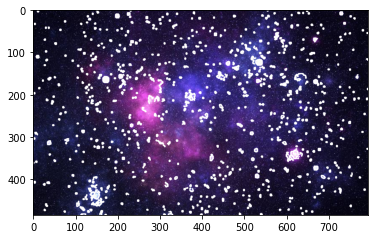

Hay 690 estrellas


In [ ]:
cv2.drawContours(original,contornos,-1,(255,255,255), 2) #-1 = indica el número de contornos a dibujar, -1 se refiere a TODOS.
# (255,255,255)= indica el color de los contornos
# 2= indica el grosor del dibujo
plt.imshow(original)
plt.show() 

# Mostramos el número de estrellas
print("Hay {} estrellas".format(len(contornos)))

## **Identificación de las estrellas adultas (tono rojizo)**

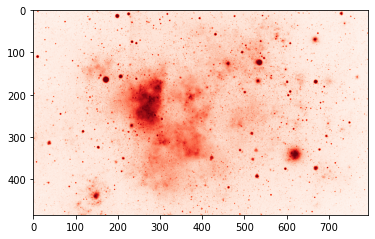

In [ ]:
img1_red = R1.astype('int32')
plt.imshow(img1_red, cmap = plt.get_cmap('Reds'))
plt.show()

#plt.hist(img1_red.ravel(), bins='auto', color="red")
#plt.title("Histograma del Componente Rojo")
#plt.show()

**Conteo de las estrellas adultas en la imagen**

![texto alternativo](https://drive.google.com/uc?id=1SDeTPzgK-QFTR4VQZelwMjJMeUlFpRp2)

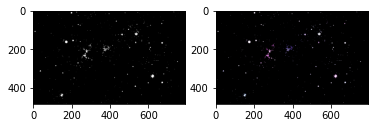

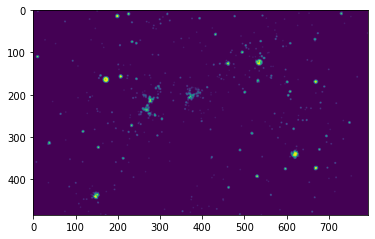

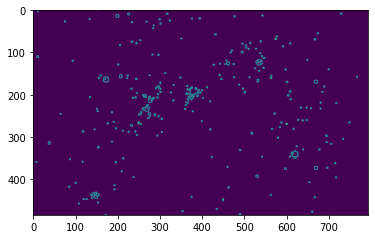

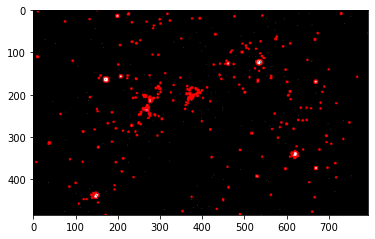

Hay 233 estrellas adultas


In [ ]:
img1_red1 = cv2.cvtColor(estrellas, cv2.COLOR_BGR2RGB)
plt.imshow(img1_red1)

#Rojos:
rojo_bajos1 = np.array([0,65,75])
rojo_altos1 = np.array([12, 255, 255])
rojo_bajos2 = np.array([240,65,75])
rojo_altos2 = np.array([256, 255, 255])

mascara_rojo1 = cv2.inRange(img1_red1, rojo_bajos1, rojo_altos1)
mascara_rojo2 = cv2.inRange(img1_red1, rojo_bajos2, rojo_altos2)

mask = cv2.add(mascara_rojo1, mascara_rojo2)

# Elegimos el umbral de rojo en HSV
umbral_bajo = (0,100,100)
umbral_alto = (50,255,255)
# hacemos la mask y filtramos en la original
#mask = cv2.inRange(img1_red1, umbral_bajo, umbral_alto)
res = cv2.bitwise_and(estrellas, estrellas, mask=mask)
# imprimimos los resultados
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(res)
plt.show()

# Convertimos a escala de grises
gris = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

# Aplicar suavizado Gaussiano
gauss = cv2.GaussianBlur(gris, (5,5), 0)
 
plt.imshow(gauss)
plt.show()

# Detectamos los bordes con Canny
canny = cv2.Canny(gauss, 50, 150)
 
plt.imshow(canny)
plt.show()

# Buscamos los contornos
(contornos,_) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
 
cv2.drawContours(res,contornos,-1,(255,0,0), 2)
plt.imshow(res)
plt.show() 

# Mostramos el número de estrellas
print("Hay {} estrellas adultas".format(len(contornos)))
#cv2.waitKey(0)

## **Identificación de las estrellas jóvenes (tono azul)**

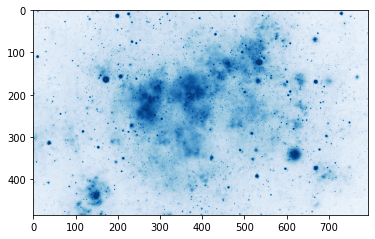

In [ ]:
img1_blue = B1.astype('int32')
plt.imshow(img1_blue, cmap = plt.get_cmap('Blues'))
plt.show()

#plt.hist(img1_blue.ravel(), bins='auto', color="blue")  # arguments are passed to np.histogram
#plt.title("Histograma del Componente Azul")
#plt.show()

**Conteo de las estrellas jóvenes en la imagen**

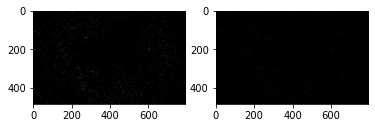

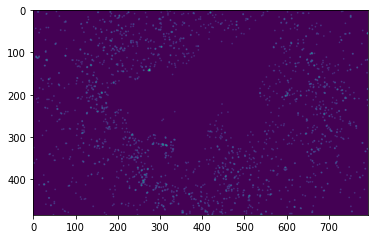

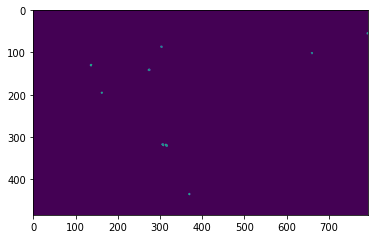

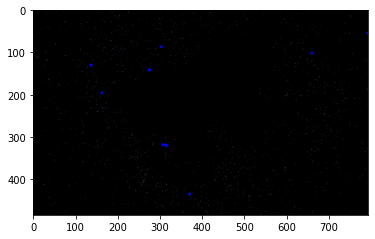

Hay 9 estrellas jóvenes


In [ ]:
img1_blue1 = cv2.cvtColor(estrellas, cv2.COLOR_BGR2RGB)
plt.imshow(img1_blue1)

azul_bajos = np.array([100,65,75])
azul_altos = np.array([130, 255, 255])

# hacemos la mask y filtramos en la original
mask = cv2.inRange(img1_blue1, azul_bajos, azul_altos)
res = cv2.bitwise_and(estrellas, estrellas, mask=mask)
# imprimimos los resultados
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(res)
plt.show()

# Convertimos a escala de grises
gris = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

# Aplicar suavizado Gaussiano
gauss = cv2.GaussianBlur(gris, (5,5), 0)
 
plt.imshow(gauss)
plt.show()

# Detectamos los bordes con Canny
canny = cv2.Canny(gauss, 50, 150)
 
plt.imshow(canny)
plt.show()

# Buscamos los contornos
(contornos,_) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(res,contornos,-1,(0,0,255), 2)
plt.imshow(res)
plt.show() 

# Mostramos el número de estrellas
print("Hay {} estrellas jóvenes".format(len(contornos)))
#cv2.waitKey(0)